# Diabetes Prediction Model

### Exploratory data analysis (EDA)

### 1. Problem Statement

+ Diabetes is a widespread chronic disease with significant health implications globally. Early detection and effective management of diabetes risk factors are crucial in reducing associated complications and improving patient outcomes. This project aims to leverage patient health data to predict diabetes risk factors based on various health indicators.
+ The dataset consists of anonymized patient health records collected from a healthcare facility. It includes demographic information such as age, gender, and clinical measurements including Body Mass Index (BMI), Glycated Hemoglobin (HbA1c), Blood Glucose Level, as well as binary indicators for Hypertension and Heart Disease. Smoking history is also documented for each patient.

### 2. Data Collection

The data was collected from the kaggle:
https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

### 3. Data understanding

The dataset consists of 100,000 entries with 10 columns

+ PatientId: Each patient is uniquely identified by a PatientId.
+ Gender: The gender of the patients can be either Female or Male.
+ Age: Represents the age of the patient in years (e.g., 80.0, 54.0).
+ Hypertension: Indicates whether the patient has hypertension. For example, PID_1 (PatientID 1 does not have hypertension (0.0), while PID_5 has hypertension (1.0).
+ HeartDisease: Indicates whether the patient has heart disease. PID_1 has heart disease (1.0), whereas PID_2 does not (0.0).
+ SmokingHistory: Describes the patient's smoking history. Categories include 'never', 'current', 'former', and 'No Info'. For example, PID_3 has never smoked ('never'), PID_4's smoking history is not specified ('No Info').
+ Bmi: Body Mass Index (BMI) is provided for each patient, indicating their relative body weight based on height and weight.
+ GlycatedHemoglobin: Shows the patient's glycated hemoglobin (HbA1c) level, an indicator of long-term blood glucose levels.
+ BloodGlucoseLevel: Provides the current blood glucose level of the patient.
+ Diabetes: Indicates whether the patient has diabetes.


### 4. Data Ingestion

In [64]:
import pandas as pd
#import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pickle

### 5.Data cleaning

In [65]:
#Reading the csv file in df dataframe
df=pd.read_csv("diabetes_prediction_dataset.csv")

In [66]:
#First five rows of dataset
df.head()

,PatientId,Gender,Age,Hypertension,HeartDisease,SmokingHistory,Bmi,GlycatedHemoglobin,BloodGlucoseLevel,Diabetes
0,PID_1,Female,80.0,0.0,1.0,never,25.19,6.6,140.0,0
1,PID_2,Female,54.0,0.0,0.0,No Info,27.32,6.6,80.0,0
2,PID_3,Male,28.0,0.0,0.0,never,27.32,5.7,158.0,0
3,PID_4,Female,36.0,0.0,0.0,current,23.45,5.0,155.0,0
4,PID_5,Male,76.0,1.0,1.0,current,20.14,4.8,155.0,0


In [67]:
#Printing the number of missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

PatientId                0
Gender                   0
Age                      0
Hypertension           547
HeartDisease          1215
SmokingHistory           0
Bmi                    772
GlycatedHemoglobin       0
BloodGlucoseLevel      547
Diabetes                 0
dtype: int64


+ Columns Hypertension and HeartDisease have binary values (0 or 1) and have 547 and 1215 null values respectively
+ Columns Bmi and BloodGlucoseLevel have 772 and 547 null values respectively

#### Filling the null values in Bmi and BloodGlucoseLevel columns


+ For filling the null values of Bmi and BloodGlucoseLevel columns, first we will check for outliers in each column.
+ If outlier is present then it will significantly affect the mean , therefore we will fill the null values with median.
+ Else if outliers are not present we will fill the null values with mean.

In [68]:
#Calculating the first and third quartile i.e 25 percentile and 75 percentile of values of Bmi column
Q1_bmi = df['Bmi'].quantile(0.25)
Q3_bmi = df['Bmi'].quantile(0.75)
#Calculating the Interquartile Range
IQR_bmi = Q3_bmi - Q1_bmi

#Calculating the first and third quartile i.e 25 percentile and 75 percentile of values of BloodGlucoseLevel column
Q1_glucose = df['BloodGlucoseLevel'].quantile(0.25)
Q3_glucose = df['BloodGlucoseLevel'].quantile(0.75)
#Calculating the Interquartile Range
IQR_glucose = Q3_glucose - Q1_glucose

# checking if outliers are present
outliers_bmi = (df['Bmi'] < (Q1_bmi - 1.5 * IQR_bmi)) | (df['Bmi'] > (Q3_bmi + 1.5 * IQR_bmi))
outliers_glucose = (df['BloodGlucoseLevel'] < (Q1_glucose - 1.5 * IQR_glucose)) | (df['BloodGlucoseLevel'] > (Q3_glucose + 1.5 * IQR_glucose))

# Fill missing values based on outlier detection
if outliers_bmi.any:
    # If outliers are present, fill with median
    median_bmi = df['Bmi'].median()
    df['Bmi'].fillna(median_bmi, inplace=True)
else:
    mean_bmi = df['Bmi'].mean()
    df['Bmi'].fillna(mean_bmi, inplace=True)
    
if outliers_glucose.any():
    median_glucose = df['BloodGlucoseLevel'].median()
    df['BloodGlucoseLevel'].fillna(median_glucose, inplace=True)
else:
    mean_glucose = df['BloodGlucoseLevel'].mean()
    df['BloodGlucoseLevel'].fillna(mean_glucose, inplace=True)


C:\Users\gurle\AppData\Local\Temp\ipykernel_21740\1673639822.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bmi'].fillna(median_bmi, inplace=True)
C:\Users\gurle\AppData\Local\Temp\ipykernel_21740\1673639822.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [69]:
missing_values = df.isnull().sum()
print(missing_values)

PatientId                0
Gender                   0
Age                      0
Hypertension           547
HeartDisease          1215
SmokingHistory           0
Bmi                      0
GlycatedHemoglobin       0
BloodGlucoseLevel        0
Diabetes                 0
dtype: int64


Now there are no null values in Bmi and BloodGlucoseLevel 

#### Filling the null values in Hypertension and HeartDisease columns

Since these columns can only be filled with binary values i.e either 0 or 1 we will use mode to fill the values

In [70]:
# Calculate the mode of Hypertension
mode_hypertension = df['Hypertension'].mode()[0]  # Mode returns a Series, so we select the first value

# Fill missing values in Hypertension with the mode
df['Hypertension'].fillna(mode_hypertension, inplace=True)

C:\Users\gurle\AppData\Local\Temp\ipykernel_21740\3886472905.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Hypertension'].fillna(mode_hypertension, inplace=True)


In [71]:
# Calculate the mode of HeartDisease
mode_heart_disease = df['HeartDisease'].mode()[0]  # Mode returns a Series, so we select the first value

# Fill missing values in HeartDisease with the mode
df['HeartDisease'].fillna(mode_heart_disease, inplace=True)

C:\Users\gurle\AppData\Local\Temp\ipykernel_21740\338092239.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HeartDisease'].fillna(mode_heart_disease, inplace=True)


In [72]:
missing_values = df.isnull().sum()
print(missing_values)

PatientId             0
Gender                0
Age                   0
Hypertension          0
HeartDisease          0
SmokingHistory        0
Bmi                   0
GlycatedHemoglobin    0
BloodGlucoseLevel     0
Diabetes              0
dtype: int64


Now there are no null values in the dataset

### 6. Data analysis

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PatientId           100000 non-null  object 
 1   Gender              100000 non-null  object 
 2   Age                 100000 non-null  float64
 3   Hypertension        100000 non-null  float64
 4   HeartDisease        100000 non-null  float64
 5   SmokingHistory      100000 non-null  object 
 6   Bmi                 100000 non-null  float64
 7   GlycatedHemoglobin  100000 non-null  float64
 8   BloodGlucoseLevel   100000 non-null  float64
 9   Diabetes            100000 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 7.6+ MB


In [74]:
print("***Statistical analysis***")
df.describe()


***Statistical analysis***


,Age,Hypertension,HeartDisease,Bmi,GlycatedHemoglobin,BloodGlucoseLevel,Diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.074750,0.039210,27.317985,5.527507,138.064860,0.085000
std,22.516840,0.262989,0.194095,6.608913,1.070672,40.596097,0.278883
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.680000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,29.520000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [75]:
df.shape

(100000, 10)

### 7. Data visualization

#### Univariate analysis

In [53]:
print("Columns in the dataset")
print(df.columns)

Columns in the dataset
Index(['PatientId', 'Gender', 'Age', 'Hypertension', 'HeartDisease',
       'SmokingHistory', 'Bmi', 'GlycatedHemoglobin', 'BloodGlucoseLevel',
       'Diabetes'],
      dtype='object')


In [14]:
#Dividing the columns into numerical and categorical features
num_feature=[i for i in df.columns if df[i].dtype!=object]
cat_feature=[i for i in df.columns if df[i].dtype==object]

In [15]:
print("There are {} Numerical features:{}".format(len(num_feature),num_feature))
print("There are {} Categorical features:{}".format(len(cat_feature),cat_feature))

There are 7 Numerical features:['Age', 'Hypertension', 'HeartDisease', 'Bmi', 'GlycatedHemoglobin', 'BloodGlucoseLevel', 'Diabetes']
There are 3 Categorical features:['PatientId', 'Gender', 'SmokingHistory']


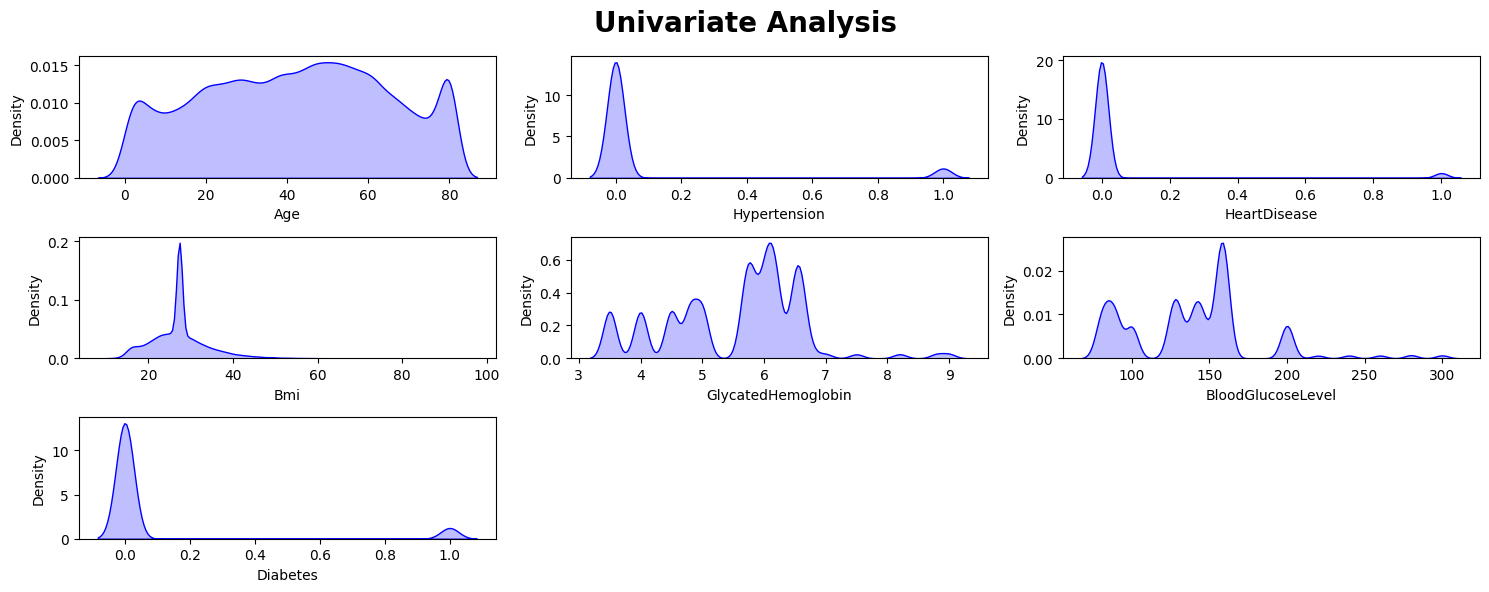

In [16]:
plt.figure(figsize=(15,6))
plt.suptitle("Univariate Analysis",fontsize=20,fontweight='bold')

for i in range(0,len(num_feature)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=df[num_feature[i]],fill=True,color='b')
    plt.xlabel(num_feature[i])
    plt.tight_layout()

#### Conclusions:

+  A symmetrical distribution of age indicates that data points are evenly distributed around the mean.
+  The distribution for diabetes suggests that there are two distinct groups in the dataset: one group with a low prevalence of diabetes (0.0) and another with a higher prevalence (1.0). The larger peak at 0.0 indicates a significant proportion of individuals in the dataset do not have diabetes.
+  The peak in the KDE plot of BMI suggests that a significant number of individuals have BMI values concentrated within the range of 20 to 40.


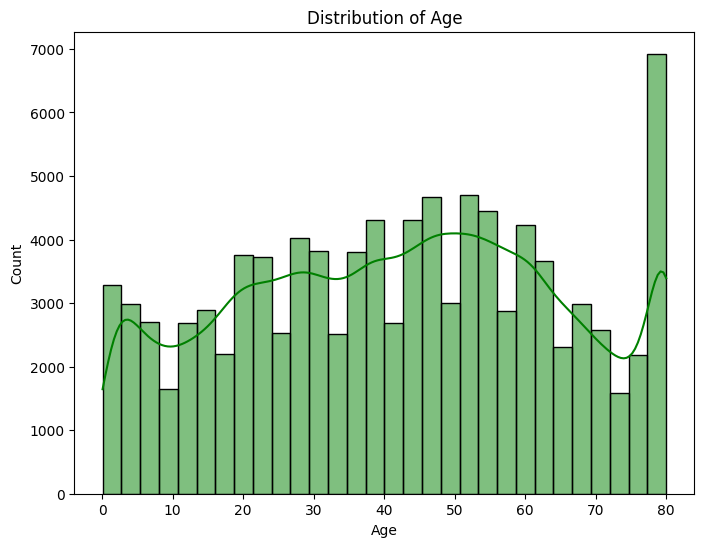

In [17]:

plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='green')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Conclusions:

+  The peak around age 80 suggests that a significant proportion of individuals in the dataset are elderly.
+  The peaks between 40-50 and 50-60 indicate a significant representation of individuals in their middle-aged years.

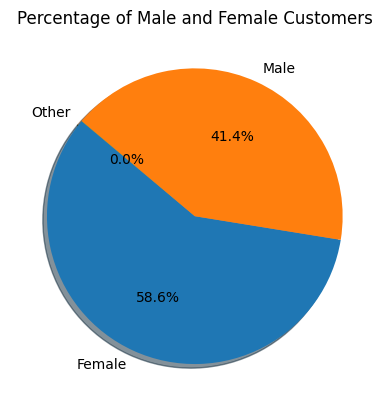

In [18]:
gender_counts = df['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Male and Female Customers')
plt.show()

#### Conclusions:

+ The pie chart shows that the maximum people in the datset are female.
+ There are 41.4% of males and 58.6% of females in the datset

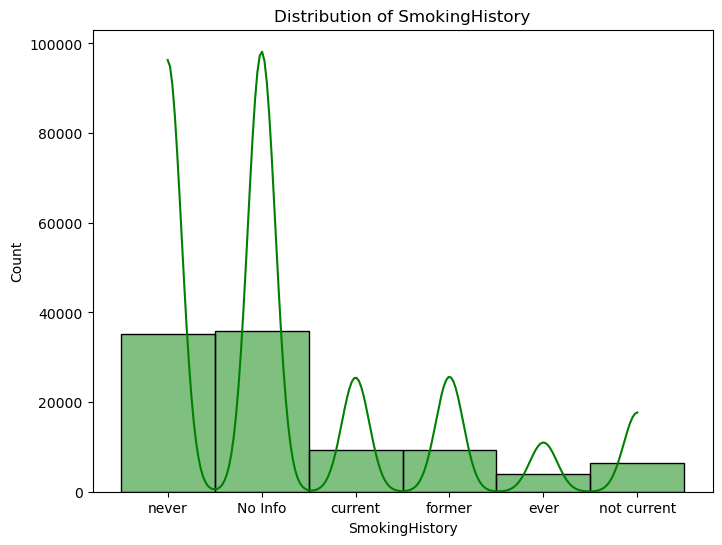

In [19]:

plt.figure(figsize=(8, 6))
sns.histplot(df['SmokingHistory'], bins=20, kde=True, color='green')
plt.title('Distribution of SmokingHistory')
plt.xlabel('SmokingHistory')
plt.ylabel('Count')
plt.show()

#### Conclusions:

+ The highest bar representing 'No Info' suggests a significant portion of dataset lacks information regarding smoking history.
+ The second highest bar for 'never' indicates a substantial proportion of individuals in dataset have never smoked.

#### Conclusions:

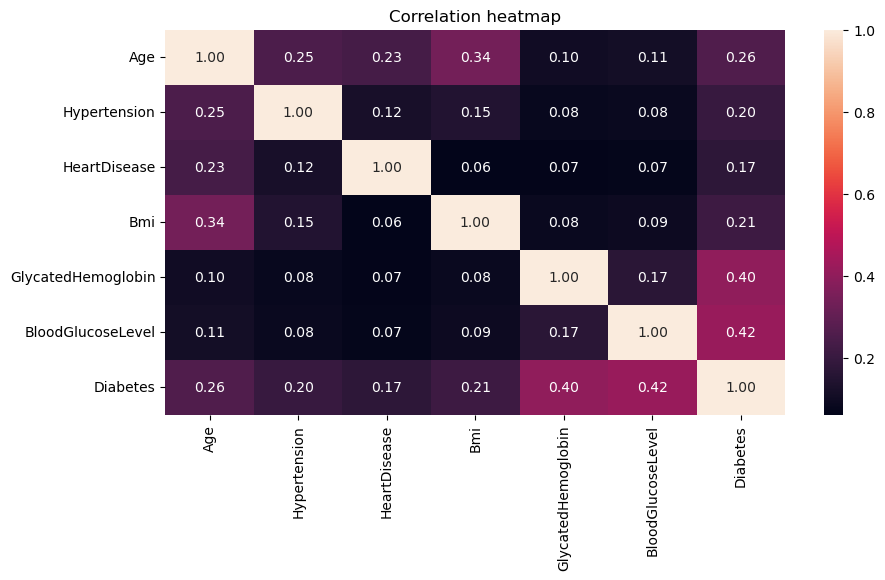

In [20]:
df2= df.drop(columns=["PatientId","Gender","SmokingHistory"])
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr(), annot=True, fmt = ".2f")
plt.title("Correlation heatmap")
plt.show()

The above heatmap shows the correlation matrix between each numerical coumns:


+ A correlation coefficient of 0.42 indicates a positive linear relationship between 'BloodGlucoseLevel' and 'Diabetes'. Higher levels of blood glucose are associated with an increased likelihood of having diabetes.
+ The correlation coefficient of 0.26 between 'Age' and 'Diabetes' suggests a positive but moderate relationship between these two variables.
+ A correlation coefficient of 0.08 indicates a weak positive linear relationship between 'Hypertension' and 'GlycatedHemoglobin'. This means that there is a slight tendency for individuals with hypertension to have slightly higher levels of glycated hemoglobin, but the relationship is not significant.

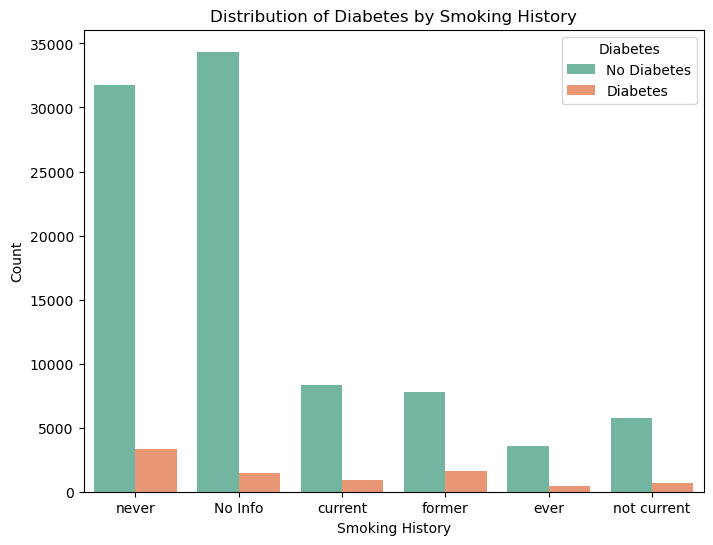

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SmokingHistory', hue='Diabetes', data=df, palette='Set2')
plt.title('Distribution of Diabetes by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.legend(title='Diabetes', loc='upper right', labels=['No Diabetes', 'Diabetes'])
plt.show()

#### Conclusions

The countplot above shows the distribution of diabetes by smoking history:

+ Individuals who have never smoked ('never') show a higher count of no diabetes compared to diabetes.
+ The category 'No Info' shows a similar trend with a higher count of no diabetes.

# Applying algorithms

#### Separating features and target variable

In [76]:
x = df.drop(columns=["Diabetes","PatientId"]) #Independent variables (features)
y = df['Diabetes'] #Dependent variable (target)

In [77]:
x = pd.get_dummies(x,columns=["SmokingHistory","Gender"],dtype=int)

In [78]:
x

,Age,Hypertension,HeartDisease,Bmi,GlycatedHemoglobin,BloodGlucoseLevel,SmokingHistory_No Info,SmokingHistory_current,SmokingHistory_ever,SmokingHistory_former,SmokingHistory_never,SmokingHistory_not current,Gender_Female,Gender_Male,Gender_Other
0,80.0,0.0,1.0,25.19,6.6,140.0,0,0,0,0,1,0,1,0,0
1,54.0,0.0,0.0,27.32,6.6,80.0,1,0,0,0,0,0,1,0,0
2,28.0,0.0,0.0,27.32,5.7,158.0,0,0,0,0,1,0,0,1,0
3,36.0,0.0,0.0,23.45,5.0,155.0,0,1,0,0,0,0,1,0,0
4,76.0,1.0,1.0,20.14,4.8,155.0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0.0,0.0,27.32,6.2,90.0,1,0,0,0,0,0,1,0,0
99996,2.0,0.0,0.0,17.37,6.5,100.0,1,0,0,0,0,0,1,0,0
99997,66.0,0.0,0.0,27.83,5.7,155.0,0,0,0,1,0,0,0,1,0
99998,24.0,0.0,0.0,35.42,4.0,100.0,0,0,0,0,1,0,1,0,0


In [79]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: Diabetes, Length: 100000, dtype: int64

#### Split the data into training and testing sets

In [80]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)

(80000, 15)
(80000,)


In [81]:
smote = SMOTE(random_state=42)
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Resampled X_train shape:", X_resampled.shape)
print("Resampled y_train shape:", y_resampled.shape)

Resampled X_train shape: (146306, 15)
Resampled y_train shape: (146306,)


+ x: This represents the input features or independent variables.
+ y: This represents the target variable or dependent variable that you are trying to predict.
test data 20% training data 80%

In [82]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80000, 15)
(80000,)
(20000, 15)
(20000,)


In [83]:
X_train.head()

,Age,Hypertension,HeartDisease,Bmi,GlycatedHemoglobin,BloodGlucoseLevel,SmokingHistory_No Info,SmokingHistory_current,SmokingHistory_ever,SmokingHistory_former,SmokingHistory_never,SmokingHistory_not current,Gender_Female,Gender_Male,Gender_Other
2852,22.0,0.0,0.0,27.32,5.7,85.0,0,0,0,0,1,0,0,1,0
64616,39.0,0.0,0.0,29.24,6.2,155.0,0,0,1,0,0,0,0,1,0
62248,19.0,0.0,0.0,27.32,6.0,155.0,1,0,0,0,0,0,1,0,0
99365,50.0,0.0,0.0,46.02,6.5,200.0,1,0,0,0,0,0,0,1,0
3276,11.0,0.0,0.0,19.79,6.5,90.0,1,0,0,0,0,0,0,1,0


In [84]:
X_test.head()

,Age,Hypertension,HeartDisease,Bmi,GlycatedHemoglobin,BloodGlucoseLevel,SmokingHistory_No Info,SmokingHistory_current,SmokingHistory_ever,SmokingHistory_former,SmokingHistory_never,SmokingHistory_not current,Gender_Female,Gender_Male,Gender_Other
8682,21.0,0.0,0.0,27.32,4.5,155.0,0,0,0,0,1,0,0,1,0
31228,66.0,0.0,0.0,22.52,5.7,145.0,0,0,0,0,1,0,1,0,0
25514,21.0,0.0,0.0,23.29,6.5,80.0,1,0,0,0,0,0,0,1,0
43982,17.0,0.0,0.0,20.32,5.7,159.0,1,0,0,0,0,0,1,0,0
71364,6.0,0.0,0.0,15.75,6.6,145.0,1,0,0,0,0,0,1,0,0


In [ ]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Dictionary to store evaluation results
results = {}

for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred)
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': confusion
    }
    
    # Print results
    print(f'\n{name} Evaluation:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')


C:\Users\gurle\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Evaluation:
Accuracy: 0.9399
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     18347
           1       0.61      0.75      0.67      1653

    accuracy                           0.94     20000
   macro avg       0.79      0.85      0.82     20000
weighted avg       0.95      0.94      0.94     20000

Confusion Matrix:
[[17554   793]
 [  408  1245]]


### Comparing the algorithms

Logistic Regression Accuracy: 0.9399
Support Vector Machine Accuracy: 0.8817
Decision Tree Accuracy: 0.9886
Random Forest Accuracy: 0.9922


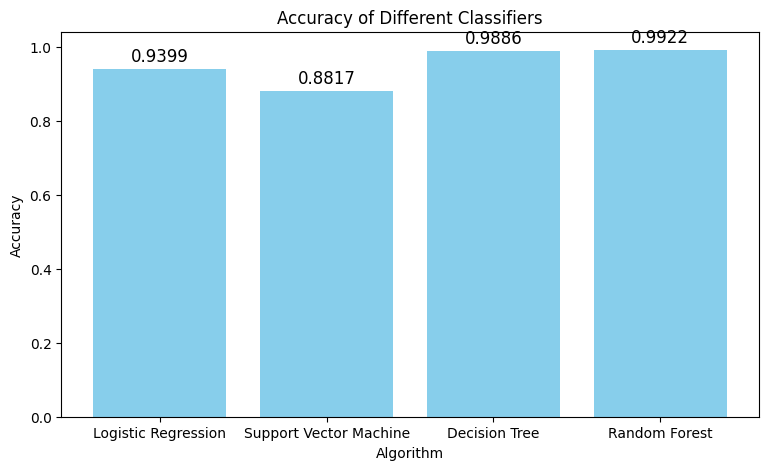

In [86]:
for name, result in results.items():
    print(f'{name} Accuracy: {result["Accuracy"]:.4f}')

# Extract keys and values for plotting
names = results.keys()
accuracies = [result["Accuracy"] for result in results.values()]

# Plot Accuracy
plt.figure(figsize=(9,5))
bars = plt.bar(names, accuracies, color='skyblue')

# Adding data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.4f}',
             ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.show()

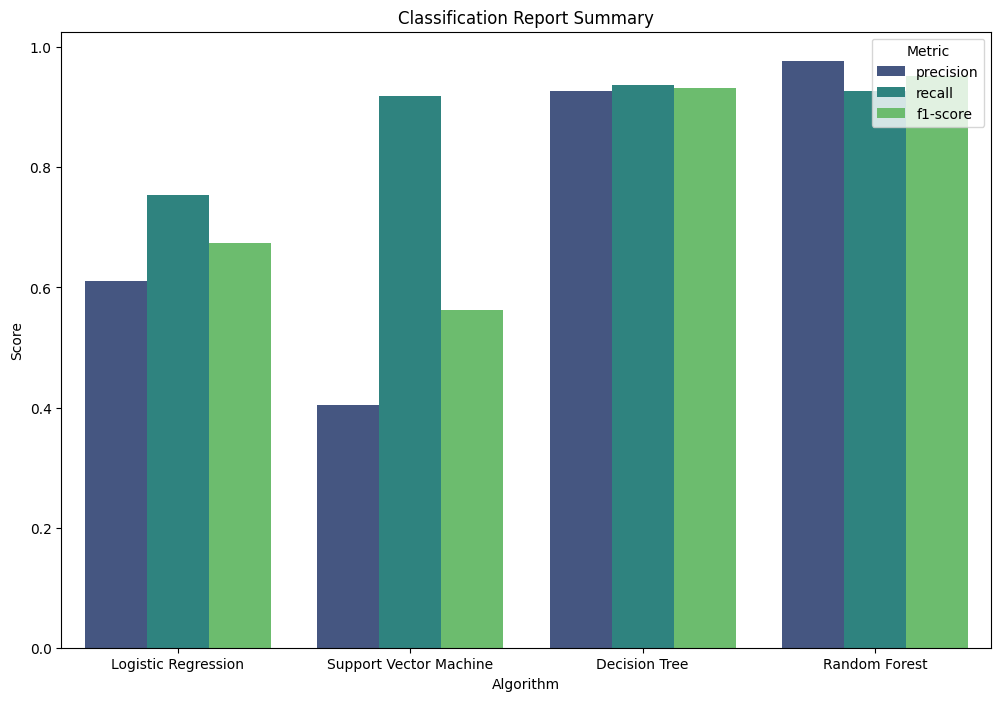

In [87]:
# Preparing data for classification report summary
report_data = [] #This list will store dictionaries containing metrics for each classifier.
for name, result in results.items():
    report = result['Classification Report'] #dictionary containing precision, recall, and F1-score metrics for each class.
    metrics = ['precision', 'recall', 'f1-score'] #This list specifies the metrics to extract from the classification report.
    for metric in metrics: #This loop iterates over the list of metrics, which includes 'precision', 'recall', and 'f1-score'.
        if '1' in report:  # Ensure the positive class metrics are present
            report_data.append({
                'Algorithm': name,
                'Metric': metric,
                'Score': report['1'].get(metric, 0.0)
            })

df_report = pd.DataFrame(report_data)

# Classification Report Summary
plt.figure(figsize=(12, 8))
sns.barplot(x='Algorithm', y='Score', hue='Metric', data=df_report, palette='viridis')
plt.title('Classification Report Summary')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend(title='Metric', loc='upper right')
plt.show()

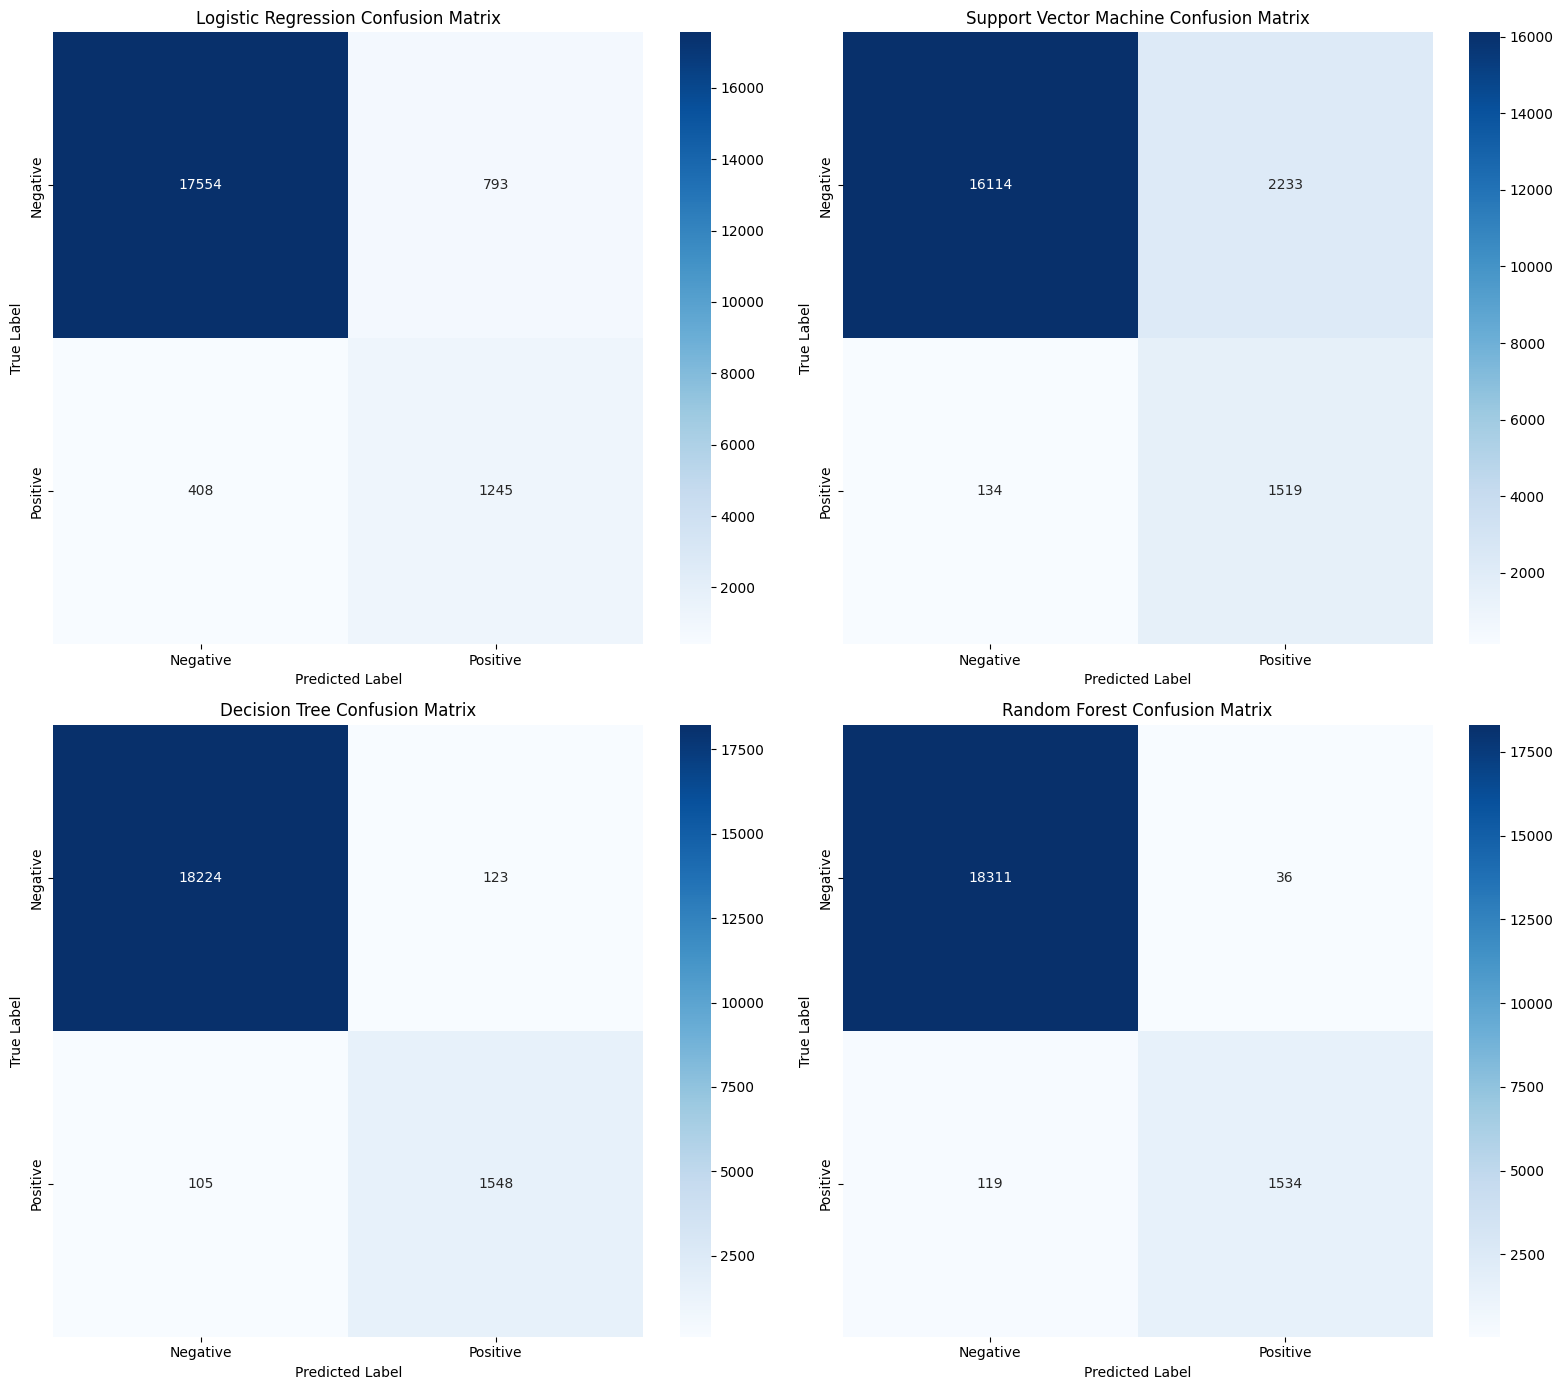

In [88]:
# Plot Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.flatten()

for i, (name, result) in enumerate(results.items()):
    cm = result['Confusion Matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()

### Algorithms used

#### Logistic Regression

+ Logistic Regression is a statistical method used for binary classification problems. It estimates probabilities using a logistic function, which is particularly useful for problems where you want to predict the probability of an outcome. It's straightforward and interpretable, making it a good choice when you need to understand the relationship between features and the target variable. It works well when the relationship between the features and the outcome is approximately linear.


#### Support Vector Machine (SVM)

+ Support Vector Machine (SVM) is a powerful classification algorithm that works by finding the hyperplane that best separates different classes in the feature space. It can handle both linear and non-linear classification problems through the use of kernel functions. SVM is known for its robustness and effectiveness in high-dimensional spaces, making it suitable for complex datasets. However, it may require careful tuning of parameters and can be computationally expensive.


####  Decision Tree

+ Decision Tree is a tree-like model used for both classification and regression tasks. It splits the data into branches based on feature values, with each leaf node representing a class label or a value. Decision Trees are easy to interpret and visualize, making them useful for understanding the decision-making process. They handle both numerical and categorical data well but can be prone to overfitting, especially with deep trees. Pruning techniques and ensemble methods like Random Forests can help mitigate overfitting.


####  Random Forest

+ Random Forest is an ensemble learning method that constructs multiple decision trees and combines their predictions to improve accuracy and control overfitting. It builds a "forest" of decision trees by randomly sampling data and features, then aggregates the results to make the final prediction. This approach generally offers high accuracy and robustness, as it averages out the predictions of many trees to reduce variance and improve generalization. Random Forests are versatile and can handle large datasets with complex interactions between features.

### Analysis


##### 1. Accuracy:


+ Highest: Random Forest (0.9693)
+ Lowest: SVM (0.9472)


##### 2. Precision(How many predicted positives are actual positives)

+ Highest: SVM (1.00)
+ Lowest: Decision Tree (0.73)

##### 3. Recall(How many actual positives are correctly predicted)

+ Highest: Decision Tree (0.73)
+ Lowest: SVM (0.38)

##### 4. F1-Score(Balance between precision and recall):


+ Highest: Random Forest (0.79)
+ Lowest: SVM (0.55)

## Conclusions

#### Logistic regression

+ Logistic Regression achieved an accuracy of 96.01%, indicating strong overall performance. It has a high precision (0.89), meaning that when it predicts a positive case, it is quite accurate. However, its recall  is lower (0.62), suggesting that it misses a considerable number of actual positive cases. The F1-Score is 0.73, reflecting a moderate balance between precision and recall. The confusion matrix shows that it struggles with false negatives, where it incorrectly classifies actual positives as negatives.

#### Support Vector Machine (SVM)

+ The SVM model has an accuracy of 94.87% and offers a good balance , with both precision and recall at 0.95 and 1.00. This balance results in an F1-Score of 0.98, demonstrating a solid performance in identifying positive cases while avoiding false positives. The confusion matrix shows a reasonable number of true positives but also a higher number of false positives compared to Random Forest. The Decision Tree is effective in capturing positive cases but may produce more false positives.

#### Random Forest

+ Random Forest outperforms the other models with an accuracy of 96.93%, reflecting its strong overall performance. It has a high precision (0.94) and recall (0.68) , resulting in an impressive F1-Score of 0.79. This model balances precision and recall well, making it effective at both correctly identifying positive cases and minimizing false negatives. The confusion matrix shows that Random Forest has the fewest false positives and false negatives, indicating it is highly reliable for classifying positive cases accurately.

#### Decision Tree

+ The Decision Tree model has an accuracy of 95.36% , with both precision and recall at 0.73. This balance results in an F1-Score of 0.73, demonstrating a solid performance in identifying positive cases while avoiding false positives. The confusion matrix shows a reasonable number of true positives but also a higher number of false positives compared to Random Forest. The Decision Tree is effective in capturing positive cases but may produce more false positives.

### Best Overall Performance:


+  Random Forest seems to be the best overall performer based on accuracy and F1-Score, which balances precision and recall. It has the highest accuracy and a good F1-Score, indicating a good balance between precision and recall.

In [30]:
#Making prediction on new data with random forest

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict([[12.0,1.0,1.0,25.19,6.6,140.0,0,0,0,0,1,0,1,0,0]])
print(y_pred)
if y_pred == [0] :
    print("Not a diabetes patient")
else :
    print("diabetes patient")

[0]
Not a diabetes patient


C:\Users\gurle\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [31]:
# SAVING THE MODEL
save_path = r'D:\Summer internship cllg\summer internship project\model\rf_diabetes_model.pkl'

# Save the trained Random Forest model
with open(save_path, 'wb') as file:
    pickle.dump(rf_classifier, file)

print(f"Model saved to {save_path}")


Model saved to D:\Summer internship cllg\summer internship project\model\rf_diabetes_model.pkl


In [40]:
import tkinter as tk
from tkinter import messagebox
import pickle
import pandas as pd

# Load the trained Random Forest model
model_path = r'D:\Summer internship cllg\summer internship project\model\rf_diabetes_model.pkl'
with open(model_path, 'rb') as file:
    model = pickle.load(file)

# Function to predict diabetes
def predict_diabetes():
    try:
        # Collect inputs from the user
        Age = float(entry_Age.get())
        Hypertension = float(entry_Hypertension.get())
        HeartDisease = float(entry_HeartDisease.get())
        Bmi = float(entry_Bmi.get())
        GlycatedHemoglobin = float(entry_GlycatedHemoglobin.get())
        BloodGlucoseLevel = float(entry_BloodGlucoseLevel.get())

        # Get the SmokingHistory and Gender from the dropdowns
        SmokingHistory = smoking_var.get()
        Gender = gender_var.get()

        # Map SmokingHistory and Gender to one-hot encoded values
        smoking_mapping = {
            'No Info': [1, 0, 0, 0, 0, 0],
            'current': [0, 1, 0, 0, 0, 0],
            'ever': [0, 0, 1, 0, 0, 0],
            'former': [0, 0, 0, 1, 0, 0],
            'never': [0, 0, 0, 0, 1, 0],
            'not current': [0, 0, 0, 0, 0, 1]
        }
        gender_mapping = {'Female': [1, 0, 0], 'Male': [0, 1, 0], 'Other': [0, 0, 1]}

        SmokingHistory_encoded = smoking_mapping.get(SmokingHistory, [0, 0, 0, 0, 0, 0])
        Gender_encoded = gender_mapping.get(Gender, [0, 0, 1])  # Default to 'Other' if not found

        # Create a DataFrame for the input
        input_data = pd.DataFrame({
            'Age': [Age],
            'Hypertension': [Hypertension],
            'HeartDisease': [HeartDisease],
            'Bmi': [Bmi],
            'GlycatedHemoglobin': [GlycatedHemoglobin],
            'BloodGlucoseLevel': [BloodGlucoseLevel],
            'SmokingHistory_No Info': [SmokingHistory_encoded[0]],
            'SmokingHistory_current': [SmokingHistory_encoded[1]],
            'SmokingHistory_ever': [SmokingHistory_encoded[2]],
            'SmokingHistory_former': [SmokingHistory_encoded[3]],
            'SmokingHistory_never': [SmokingHistory_encoded[4]],
            'SmokingHistory_not current': [SmokingHistory_encoded[5]],
            'Gender_Female': [Gender_encoded[0]],
            'Gender_Male': [Gender_encoded[1]],
            'Gender_Other': [Gender_encoded[2]]
        })

        # Ensure the DataFrame has the correct columns and order
        expected_columns = model.feature_names_in_
        input_data = input_data.reindex(columns=expected_columns)

        # Predict using the model
        prediction = model.predict(input_data)[0]

        # Display the result
        result = "Diabetes patient" if prediction == 1 else "Not a diabetes patient"
        result_label.config(text=result, fg='green' if prediction == 1 else 'red')

    except Exception as e:
        messagebox.showerror("Input Error", str(e))

# Create the main window
root = tk.Tk()
root.title("Diabetes Prediction")

# Set background color
root.configure(bg='#e8eaf6')  # background for the window

# Define styles
font = ('Arial', 12,)
heading_font = ('Arial', 18, 'bold')
label_font = ('Arial', 12)
padx = 15
pady = 10

# Create a heading
heading_label = tk.Label(root, text="DIABETES PREDICTION MODEL", font=heading_font, bg='#e8eaf6',fg='#004d40')
heading_label.grid(row=0, column=0, columnspan=2, pady=20, sticky='n')

# Create a Frame for the input fields
input_frame = tk.Frame(root, bg='#ffffff', bd=2, relief='solid')
input_frame.grid(row=1, column=0, padx=20, pady=20, columnspan=2, sticky='nsew')

# Configure row and column weights for center alignment
root.grid_rowconfigure(1, weight=1)
root.grid_columnconfigure(0, weight=1)
root.grid_columnconfigure(1, weight=1)

input_frame.grid_rowconfigure(list(range(7)), weight=1)
input_frame.grid_columnconfigure(0, weight=1)
input_frame.grid_columnconfigure(1, weight=1)

# Create and place the input fields inside the Frame
tk.Label(input_frame, text="Age", font=label_font, bg='#ffffff',fg='#212121').grid(row=0, column=0, padx=padx, pady=pady, sticky='e')
entry_Age = tk.Entry(input_frame, font=font, width=30)
entry_Age.grid(row=0, column=1, padx=padx, pady=pady)

tk.Label(input_frame, text="Hypertension (0 or 1)", font=label_font, bg='#ffffff').grid(row=1, column=0, padx=padx, pady=pady, sticky='e')
entry_Hypertension = tk.Entry(input_frame, font=font, width=30)
entry_Hypertension.grid(row=1, column=1, padx=padx, pady=pady)

tk.Label(input_frame, text="Heart Disease (0 or 1)", font=label_font, bg='#ffffff').grid(row=2, column=0, padx=padx, pady=pady, sticky='e')
entry_HeartDisease = tk.Entry(input_frame, font=font, width=30)
entry_HeartDisease.grid(row=2, column=1, padx=padx, pady=pady)

tk.Label(input_frame, text="Smoking History", font=label_font, bg='#ffffff').grid(row=3, column=0, padx=padx, pady=pady, sticky='e')
smoking_var = tk.StringVar(value='No Info')  # Default value
smoking_dropdown = tk.OptionMenu(input_frame, smoking_var, 'No Info', 'current', 'ever', 'former', 'never', 'not current')
smoking_dropdown.grid(row=3, column=1, padx=padx, pady=pady)

tk.Label(input_frame, text="Gender", font=label_font, bg='#ffffff').grid(row=4, column=0, padx=padx, pady=pady, sticky='e')
gender_var = tk.StringVar(value='Other')  # Default value
gender_dropdown = tk.OptionMenu(input_frame, gender_var, 'Female', 'Male', 'Other')
gender_dropdown.grid(row=4, column=1, padx=padx, pady=pady)

tk.Label(input_frame, text="BMI", font=label_font, bg='#ffffff').grid(row=5, column=0, padx=padx, pady=pady, sticky='e')
entry_Bmi = tk.Entry(input_frame, font=font, width=30)
entry_Bmi.grid(row=5, column=1, padx=padx, pady=pady)

tk.Label(input_frame, text="Glycated Hemoglobin", font=label_font, bg='#ffffff').grid(row=6, column=0, padx=padx, pady=pady, sticky='e')
entry_GlycatedHemoglobin = tk.Entry(input_frame, font=font, width=30)
entry_GlycatedHemoglobin.grid(row=6, column=1, padx=padx, pady=pady)

tk.Label(input_frame, text="Blood Glucose Level", font=label_font, bg='#ffffff').grid(row=7, column=0, padx=padx, pady=pady, sticky='e')
entry_BloodGlucoseLevel = tk.Entry(input_frame, font=font, width=30)
entry_BloodGlucoseLevel.grid(row=7, column=1, padx=padx, pady=pady)

# Create the predict button
predict_button = tk.Button(root, text="Predict", command=predict_diabetes, font=font, bg='#007bff', fg='white', relief='raised')
predict_button.grid(row=2, column=0, columnspan=2, pady=10)

# Result display
result_label = tk.Label(root, text="", font=('Times new roman', 18, 'bold'), bg='#f4f4f4')
result_label.grid(row=3, column=0, columnspan=2, pady=20)

# Run the application
root.mainloop()
